In [1]:
!pip install scikit-learn xgboost lightgbm matplotlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.utils import to_categorical

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the train dataset
df = pd.read_csv('/content/drive/MyDrive/real data v1/combined_train_data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183592 entries, 0 to 183591
Columns: 106 entries, time to label
dtypes: float64(105), object(1)
memory usage: 148.5+ MB


In [ ]:
# The first column is the time, we won't use it as a feature as it is common for all data and the last column is the label
X = df.iloc[:, 1:-1].values # All rows, all columns
y = df.iloc[:, -1].values # Labels

# Preprocess the data for amplitude
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train = X

In [ ]:
print(X_train.shape)
print(y_train.shape)

(183592, 104)
(183592,)


In [ ]:
# instantiate the classifier with n_estimators = 100
rfc_clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
rfc_clf.fit(X_train, y_train)

In [ ]:
columns= df.columns[1:-1]
columns

In [ ]:
# view the feature scores
feature_scores = pd.Series(rfc_clf.feature_importances_, index=columns).sort_values(ascending=False)

feature_scores

In [ ]:
# Creating a seaborn bar plot
plt.figure(figsize=(10, 20))
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [ ]:
# Load the test dataset
df_test = pd.read_csv('/content/drive/MyDrive/real data v1/combined_test_data.csv')

# The first column is the time, we won't use it as a feature as it is common for all data and the last column is the label
X = df_test.iloc[:, 1:-1].values # All rows, all columns
y = df_test.iloc[:, -1].values # Labels

# Preprocess the data for amplitude
label_encoder = LabelEncoder()
y_test = label_encoder.fit_transform(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_test = X

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Predict on the test set results
y_pred = rfc_clf.predict(X_test)

# Calculate accuracy for ensemble model
rfc_accuracy = accuracy_score(y_test, y_pred)

# Calculate precision for ensemble model
rfc_precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall for ensemble model
rfc_recall = recall_score(y_test, y_pred, average='weighted')


# Check accuracy score
print('Model accuracy score with 100 decision-trees :')
print(f'Test accuracy: {rfc_accuracy:.3f}')
print(f'Test precision: {rfc_precision:.3f}')
print(f'Test recall: {rfc_recall:.3f}')

In [ ]:
# confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(y_test, y_pred)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix: Random Forest")
plt.show()

In [ ]:
# The first column is the time, we won't use it as a feature as it is common for all data and the last column is the label
X = df.iloc[:, 1:53].values # All rows, all columns
y = df.iloc[:, -1].values # Labels

# Preprocess the data for amplitude
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_amplitude = X

In [ ]:
# instantiate the classifier with n_estimators = 100
rfc_amp_clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
rfc_amp_clf.fit(X_amplitude, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# The first column is the time, we won't use it as a feature as it is common for all data and the last column is the label
X = df_test.iloc[:, 1:53].values # All rows, all columns
y = df_test.iloc[:, -1].values # Labels

# Preprocess the data for amplitude
label_encoder = LabelEncoder()
y_amp_test = label_encoder.fit_transform(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_amp_test = X

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Predict on the test set results
y_amp_pred = rfc_amp_clf.predict(X_amp_test)

# Calculate accuracy for ensemble model
rfc_amp_accuracy = accuracy_score(y_amp_test, y_amp_pred)

# Calculate precision for ensemble model
rfc_amp_precision = precision_score(y_amp_test, y_amp_pred, average='weighted')

# Calculate recall for ensemble model
rfc_amp_recall = recall_score(y_amp_test, y_amp_pred, average='weighted')


# Check accuracy score
print('Model accuracy score with 100 decision-trees :')
print(f'Test accuracy: {rfc_amp_accuracy:.3f}')
print(f'Test precision: {rfc_amp_precision:.3f}')
print(f'Test recall: {rfc_amp_recall:.3f}')

Model accuracy score with 100 decision-trees :
Test accuracy: 0.805
Test precision: 0.806
Test recall: 0.805


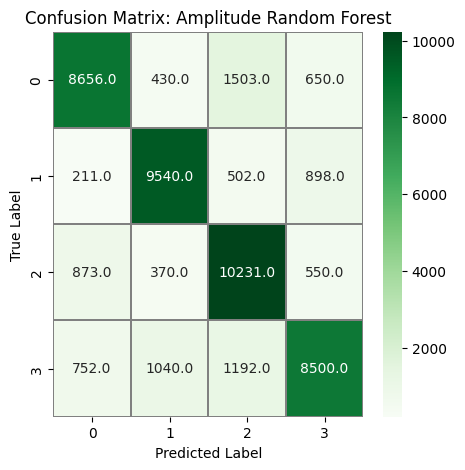

In [ ]:
# confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(y_amp_test, y_amp_pred)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix: Amplitude Random Forest")
plt.show()

#Running Other Regressors and ensambling them

In [ ]:
# Load the train dataset
df= pd.read_csv('/content/drive/MyDrive/real data v1/combined_train_data.csv')

# The first column is the time, we won't use it as a feature as it is common for all data and the last column is the label
X = df.iloc[:, 1:53].values # All rows, all columns
y = df.iloc[:, -1].values # Labels

# Preprocess the data for amplitude
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X)

In [ ]:
# Load the test dataset
df_test = pd.read_csv('/content/drive/MyDrive/real data v1/combined_test_data.csv')

# The first column is the time, we won't use it as a feature as it is common for all data and the last column is the label
X = df_test.iloc[:, 1:53].values # All rows, all columns
y = df_test.iloc[:, -1].values # Labels

# Preprocess the data for amplitude
label_encoder = LabelEncoder()
y_test = label_encoder.fit_transform(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_test = X

In [ ]:
print(np.unique(y_test))

[0 1 2 3]


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42,verbose=1)
xgb = XGBClassifier(
    max_depth=5,
    n_estimators=100,
    learning_rate=0.3,
    random_state=42,
    objective='multi:softmax',  # For multi-class classification
    num_class=4                 # Number of classes
)
lgbm = LGBMClassifier(
    num_leaves=31,
    max_depth=-1,  # No limit
    learning_rate=0.1,
    n_estimators=100,
    objective='multiclass',
    num_class=4,
    random_state=42,
    class_weight='balanced'  # Useful for imbalanced datasets
)

In [ ]:
rf_clf = rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.1min


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Predict on the test set results
y_pred = rf_clf.predict(X_test)

# Calculate accuracy for ensemble model
rfc_accuracy = accuracy_score(y_test, y_pred)

# Calculate precision for ensemble model
rfc_precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall for ensemble model
rfc_recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1 score for ensemble model
rfc_f1 = f1_score(y_test, y_pred, average='weighted')

# Check accuracy score
print('Model accuracy score with 100 decision-trees :')
print(f'Test accuracy: {rfc_accuracy:.3f}')
print(f'Test precision: {rfc_precision:.3f}')
print(f'Test recall: {rfc_recall:.3f}')
print(f'Test F1 score: {rfc_f1:.3f}')

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.1s


Model accuracy score with 100 decision-trees :
Test accuracy: 0.805
Test precision: 0.806
Test recall: 0.805
Test F1 score: 0.804


In [ ]:
xgb_clf = xgb.fit(X_train, y_train)

In [ ]:
# Predict on the test set results
xgb_pred = xgb_clf.predict(X_test)

# Calculate accuracy for ensemble model
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Calculate precision for ensemble model
xgb_precision = precision_score(y_test, xgb_pred, average='weighted')

# Calculate recall for ensemble model
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')

# Calculate F1 score for ensemble model
xgb_f1 = f1_score(y_test, xgb_pred, average='weighted')

# Check accuracy score
print('Model accuracy score with Xtreme Gradian Boosting :')
print(f'Test accuracy: {xgb_accuracy:.3f}')
print(f'Test precision: {xgb_precision:.3f}')
print(f'Test recall: {xgb_recall:.3f}')
print(f'Test F1 score: {xgb_f1:.3f}')

Model accuracy score with Xtreme Gradian Boosting :
Test accuracy: 0.687
Test precision: 0.689
Test recall: 0.687
Test F1 score: 0.686


In [ ]:
lgbm_clf = lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.107859 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13260
[LightGBM] [Info] Number of data points in the train set: 183592, number of used features: 52
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294


In [ ]:
# Predict on the test set results
lgbm_pred = lgbm_clf.predict(X_test)

# Calculate accuracy for ensemble model
lgbm_accuracy = accuracy_score(y_test, lgbm_pred)

# Calculate precision for ensemble model
lgbm_precision = precision_score(y_test, lgbm_pred, average='weighted')

# Calculate recall for ensemble model
lgbm_recall = recall_score(y_test, lgbm_pred, average='weighted')

# Calculate F1 score for ensemble model
lgbm_f1 = f1_score(y_test, lgbm_pred, average='weighted')

# Check accuracy score
print('Model accuracy score with LGBM :')
print(f'Test accuracy: {lgbm_accuracy:.3f}')
print(f'Test precision: {lgbm_precision:.3f}')
print(f'Test recall: {lgbm_recall:.3f}')
print(f'Test F1 score: {lgbm_f1:.3f}')

Model accuracy score with LGBM :
Test accuracy: 0.679
Test precision: 0.680
Test recall: 0.679
Test F1 score: 0.678


In [ ]:
# Hard Voting
voting_clf_hard = VotingClassifier(
    estimators=[('rf', rf), ('xgb', xgb), ('lgbm', lgbm)],
    voting='hard'
)

# Soft Voting
voting_clf_soft = VotingClassifier(
    estimators=[('rf', rf), ('xgb', xgb), ('lgbm', lgbm)],
    voting='soft'
)

# Fit the models
voting_clf_hard.fit(X_train, y_train)
voting_clf_soft.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.7min


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.114619 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13260
[LightGBM] [Info] Number of data points in the train set: 183592, number of used features: 52
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.1min


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.113247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13260
[LightGBM] [Info] Number of data points in the train set: 183592, number of used features: 52
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(random_state=42,
                                                     verbose=1)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            impo...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_class=4, num_parallel_tree=None, ...)),
                             ('lgbm',
                              LGBMClassifier(class_weight='balanced',
                                             num_class=4,
                                             objective='multiclass',
                                             random_state=42))],
                 voting='soft')

In [ ]:
# Predictions
hard_preds = voting_clf_hard.predict(X_test)
soft_preds = voting_clf_soft.predict(X_test)

# Accuracy
hard_accuracy = accuracy_score(y_test, hard_preds)
hard_precision = precision_score(y_test, hard_preds, average='weighted')
hard_recall = recall_score(y_test, hard_preds, average='weighted')
hard_f1 = f1_score(y_test, hard_preds, average='weighted')

soft_accuracy = accuracy_score(y_test, soft_preds)
soft_precision = precision_score(y_test, soft_preds, average='weighted')
soft_recall = recall_score(y_test, soft_preds, average='weighted')
soft_f1 = f1_score(y_test, soft_preds, average='weighted')

print('Model accuracy score with Hard Voting :')
print(f'Test accuracy: {hard_accuracy:.3f}')
print(f'Test precision: {hard_precision:.3f}')
print(f'Test recall: {hard_recall:.3f}')
print(f'Test f1: {hard_f1:.3f}')

print('Model accuracy score with Hard Voting :')
print(f'Test accuracy: {soft_accuracy:.3f}')
print(f'Test precision: {soft_precision:.3f}')
print(f'Test recall: {soft_recall:.3f}')
print(f'Test f1 : {soft_f1:.3f}')

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.1s


Model accuracy score with Hard Voting :
Test accuracy: 0.719
Test precision: 0.719
Test recall: 0.719
Test f1: 0.718
Model accuracy score with Hard Voting :
Test accuracy: 0.755
Test precision: 0.757
Test recall: 0.755
Test f1 : 0.754


In [ ]:
# Get accuracies for each class for each model
classes = np.unique(y_test)  # Assuming y_test is your true labels array
accuracies = {cls: [] for cls in classes}
rf_pred = y_pred
models = [rf_pred, xgb_pred, lgbm_pred, hard_preds]
model_names = ['RF', 'XGB', 'LGBM', 'Soft Voting']



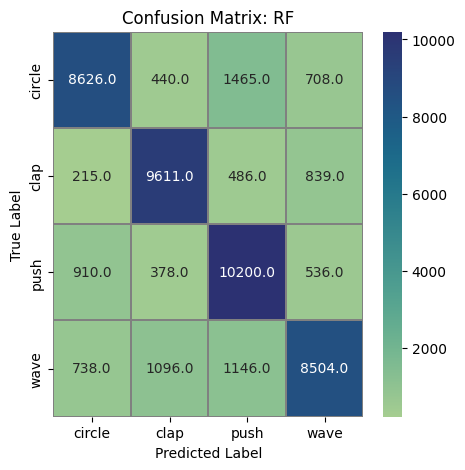

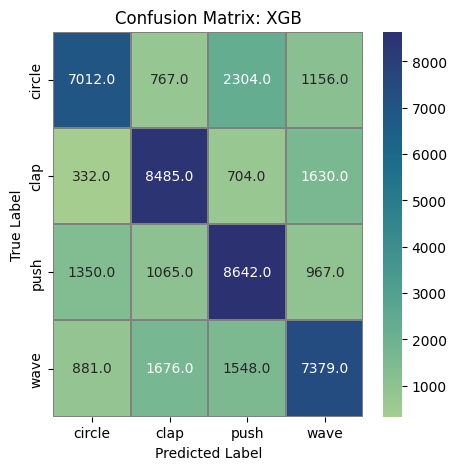

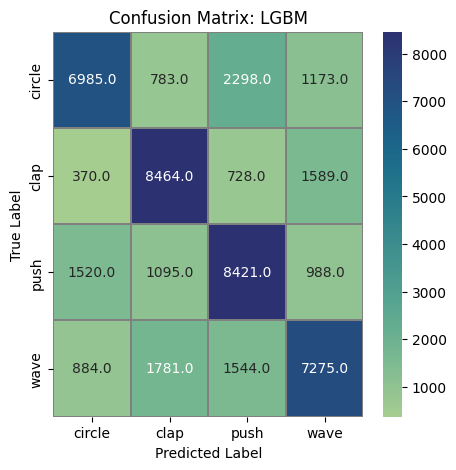

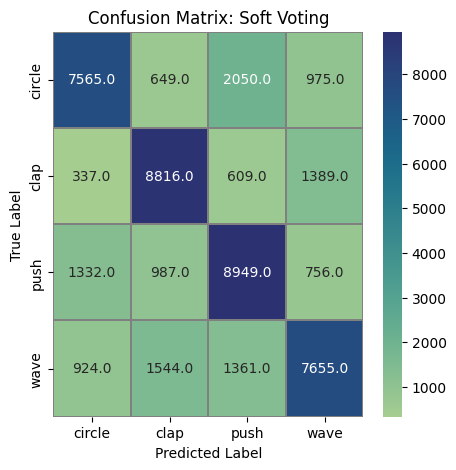

{0: [0.8223853560873295, 0.7323237597911227, 0.7157495645045598, 0.7447332151998425], 1: [0.8339262472885033, 0.7074960393562911, 0.6981770188897137, 0.7349116372124042], 2: [0.7670903211250658, 0.6547961812395817, 0.648217997074898, 0.6900300717094611], 3: [0.8032492679701521, 0.6628638160258714, 0.6598639455782312, 0.7104408352668213]}


In [ ]:

import numpy as np

def class_specific_accuracy(y_true, y_pred, class_label):
    cm = confusion_matrix(y_true, y_pred)
    class_idx = list(set(y_true))  # Get list of classes
    class_idx.sort()  # Sort classes to ensure correct indexing
    true_positives = cm[class_idx.index(class_label), class_idx.index(class_label)]
    total = np.sum(cm[:, class_idx.index(class_label)])

    return true_positives / total if total > 0 else 0

for cls in classes:
    for preds in models:
        acc = class_specific_accuracy(y_test, preds, cls)
        accuracies[cls].append(acc)
i=0
for preds in models:
    confusion_mtx = confusion_matrix(y_test, preds)  # y_test should also be in encoded form

    # Decoding the labels in y_test for axis ticks if necessary
    tick_labels = label_encoder.inverse_transform(sorted(set(y_test)))  # Use this line if using LabelEncoder

    # Plot the confusion matrix
    f, ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap='crest', linecolor="gray", fmt='.1f', ax=ax) #sns.cubehelix_palette(as_cmap=True)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    ax.set_title(f"Confusion Matrix: {model_names[i]}")
    ax.set_xticklabels(tick_labels)  # Set the tick labels on x-axis
    ax.set_yticklabels(tick_labels)  # Set the tick labels on y-axis
    plt.savefig("/content/drive/MyDrive/real data v1/Images/ML Codes/Mixed Points/Confusion Matrix "+model_names[i]+" model.png")
    plt.show()

    i += 1

# Print accuracies for verification
print(accuracies)


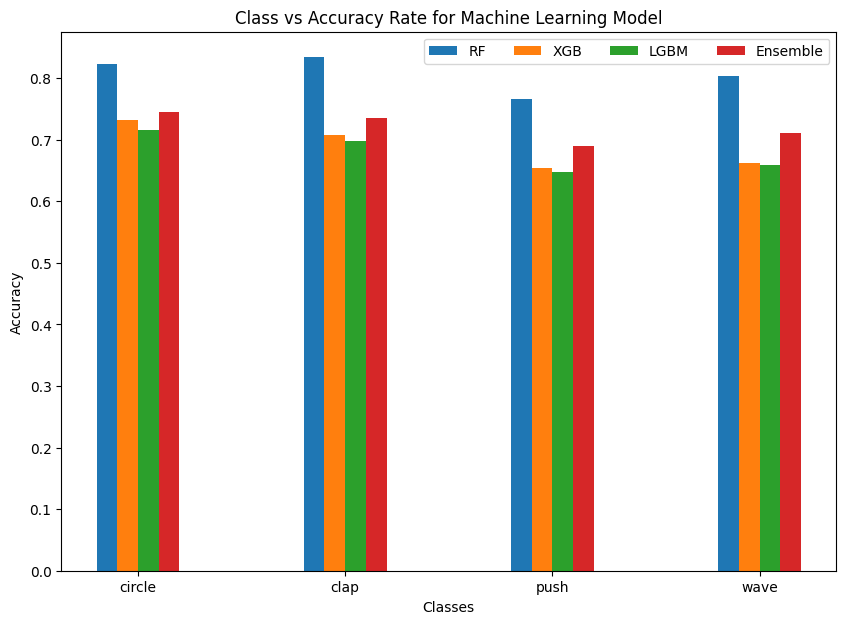

In [ ]:
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 7))

# Data to plot
class_labels = [str(cls) for cls in label_encoder.inverse_transform(classes)]
x = np.arange(len(class_labels))  # the label locations
width = 0.1  # the width of the bars

# Generate bars for each model
for i, model_name in enumerate(model_names):
    ax.bar(x + i*width, [accuracies[cls][i] for cls in classes], width, label=model_name)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Classes')
ax.set_ylabel('Accuracy')
ax.set_title('Class vs Accuracy Rate for Machine Learning Model')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(class_labels)

ax.legend(loc='upper right', ncols=4)

# Show the plot
plt.savefig("/content/drive/MyDrive/real data v1/Images/ML Codes/Mixed Points/ML Comparison "+model_names[i]+" model.png")
plt.show()





FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/real data v1/Images/Mixed Points/ML Evaluation Matrices Ensemble model.png'

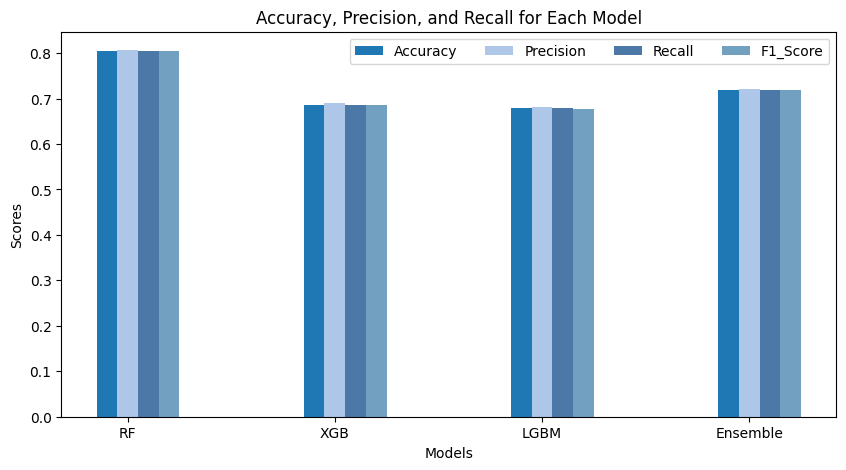

In [ ]:
# Assuming y_test is your test labels and models is a list of your trained models
metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1_Score': []
}

for preds in models:
    metrics['Accuracy'].append(accuracy_score(y_test, preds))
    metrics['Precision'].append(precision_score(y_test, preds, average='macro'))  # Use 'macro' for multiclass
    metrics['Recall'].append(recall_score(y_test, preds, average='macro'))
    metrics['F1_Score'].append(f1_score(y_test, preds, average='macro'))



# Shades of blue
colors = ['#1f77b4', '#aec7e8', '#4c78a8','#72A0C1']  # Darker to lighter shades of blue

labels = list(metrics.keys())
x = np.arange(len(model_names))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 5))
for i, (metric, color) in enumerate(zip(metrics, colors)):
    ax.bar(x + i * width, metrics[metric], width, label=metric, color=color)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Accuracy, Precision, and Recall for Each Model')
ax.set_xticks(x + width)
ax.set_xticklabels(model_names)
ax.legend(loc='upper right', ncols=4)
plt.savefig("/content/drive/MyDrive/real data v1/Images/Mixed Points/ML Evaluation Matrices "+model_names[i]+" model.png")
plt.show()


#Fixed Point Data

In [ ]:
# Load the train dataset
df= pd.read_csv('/content/drive/MyDrive/real data v1/fixed_point_data.csv')

# The first column is the time, we won't use it as a feature as it is common for all data and the last column is the label
X = df.iloc[:, 1:53].values # All rows, all columns
y = df.iloc[:, -1].values # Labels

# Preprocess the data for amplitude
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [9]:
# my_dict = {
#     'Random Forest': [80.5, 82.1],
#     'XGBoost': [68.7, 70.1],
#     'Light-GBM':[67.9, 69.3],
#     'Voting Classifier':[75.5, 76.6]
# }

my_dict = {
    'Random Forest': [80.5, 80., 80.5, 80.4 ],
    'LSTM': [81.11, 81.10, 81.11, 81.11],
}

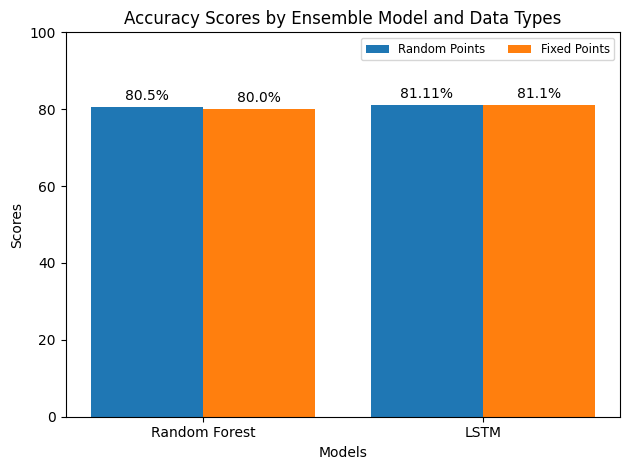

In [11]:
# Preparing data for plotting
labels = list(my_dict.keys())
random_points = [values[0] for values in my_dict.values()]
fixed_points = [values[1] for values in my_dict.values()]

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, random_points, width, label='Random Points')
rects2 = ax.bar(x + width/2, fixed_points, width, label='Fixed Points')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Accuracy Scores by Ensemble Model and Data Types')
ax.set_xticks(x)
ax.set_yticks([0, 20, 40, 60, 80, 100])
ax.set_xticklabels(labels)
ax.legend()

# Function to attach a text label above each bar, displaying its height.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(f'{height}%'),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)


plt.legend(fontsize='small', ncols=2)
fig.tight_layout()
plt.show()

In [ ]:
my_dict = {
    'CNN': [78.1, 83.8],
    'LSTM': [81.11, 82.9],
}